<div class="alert alert-info">
<H1> Capstone Project 2 - Medical Cost Prediction </H1>

<H2> Overview </H2>
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions.  This Project is to build a model that could predict the amount an individual needs to pay towards his Health insurance per year based on certain Health parameters.

<H2> Data Set </H2>
<b>Age</b> :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).<br>
<b>Sex</b> :- This is the policy holder's gender, either male or female.<br>
<b>BMI</b> :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.<br>
<b>Children</b> :- This is an integer indicating the number of children / dependents covered by the insurance plan.<br>
<b>Smoker</b> :- This is yes or no depending on whether the insured regularly smokes tobacco.<br>
<b>Region</b> :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.<br>
<b>Charges</b>:- Individual medical costs billed to health insurance
</div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [5]:
plt.style.use('ggplot')
warnings.simplefilter('ignore')

In [6]:
from scipy.stats import chi2_contingency   # For Chi-Sq
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

#Linear Regression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Train_test_split
from sklearn.model_selection import train_test_split

#cross_val_score
from sklearn.model_selection import cross_val_score

#scaling
from sklearn.preprocessing import StandardScaler

#gridsearch
from sklearn.model_selection import GridSearchCV

#models
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [7]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.sex = df.sex.replace(['male','female'],['Male','Female'])
df.smoker = df.smoker.replace(['yes','no'],['Yes','No'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<div class="alert alert-success">
<H2> Section 1: Exploratory Data Analysis </H2>
</div>

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<div class="alert alert-warning">
<H3> Key Observations from the above resultset </H3>
  i) Average age of the primary beneficiary is 39.2 and maximum age is 64.<br>
 ii) Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13 <br>
iii) Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770<br>
 iv) Median is less than mean in charges , indicating distrubution is postively skewed . <br>
  v) Customer on an average has 1 child. <br>
 vi) For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted.
</div>

In [11]:
pd.DataFrame(df.groupby("region")["age","charges","bmi","children"].
             mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

,age,charges,bmi,children
region,,,,
southwest,39.455385,12346.937377,30.596615,1.141538
northeast,39.268519,13406.384516,29.173503,1.046296
northwest,39.196923,12417.575374,29.199785,1.147692
southeast,38.939560,14735.411438,33.355989,1.049451


In [12]:
pd.DataFrame(df.groupby("sex")["age","charges","bmi","children"].
             mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

,age,charges,bmi,children
sex,,,,
Female,39.503021,12569.578844,30.377749,1.074018
Male,38.917160,13956.751178,30.943129,1.115385


In [13]:
pd.DataFrame(df.groupby("children")["age","charges","bmi"].
             mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

,age,charges,bmi
children,,,
3,41.566879,15355.318367,30.684331
1,39.453704,12731.171832,30.623148
2,39.445833,15073.563734,30.978104
4,39.000000,13850.656311,31.391200
0,38.444251,12365.975602,30.550296
5,35.611111,8786.035247,29.605000


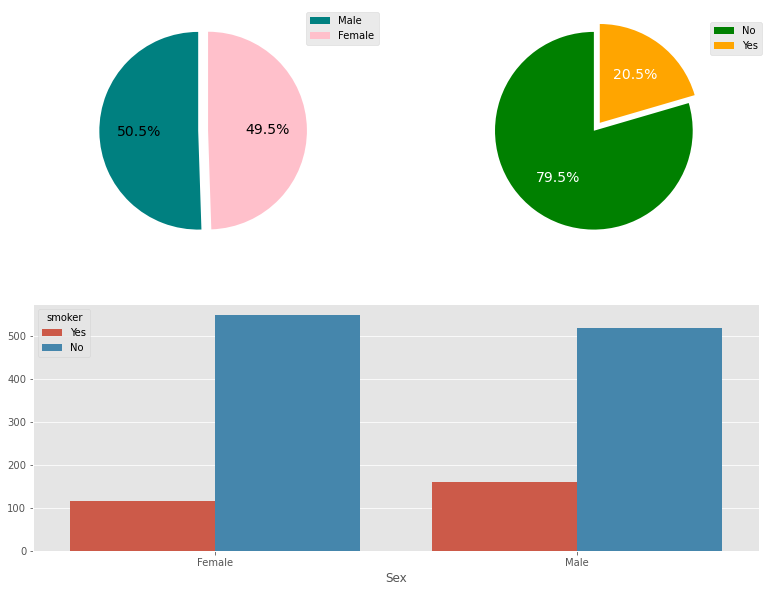

In [14]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
label  = df.sex.value_counts().index
size   = df.sex.value_counts().values
plt.pie(x=size,autopct='%1.1f%%',shadow=False, textprops={'color':"k","fontsize":14}, startangle=90,explode=(0,.1),
       colors=['teal','pink'])
plt.legend(label,bbox_to_anchor=(0.4, 0, .85, 1))
plt.subplot(2,2,2)
label  = df.smoker.value_counts().index
size   = df.smoker.value_counts().values
plt.pie(x=size,autopct='%1.1f%%',shadow=False, textprops={'color':"w","fontsize":14}, startangle=90,explode=(0,.1),
       colors=['green','orange'])
plt.legend(label,bbox_to_anchor=(0.8, -0.04, 0.4, 1))
plt.subplot(2,2,(3,4))
sns.countplot(data = df, x = 'sex', hue = 'smoker')
plt.xlabel('Sex')
plt.ylabel('')
plt.show()

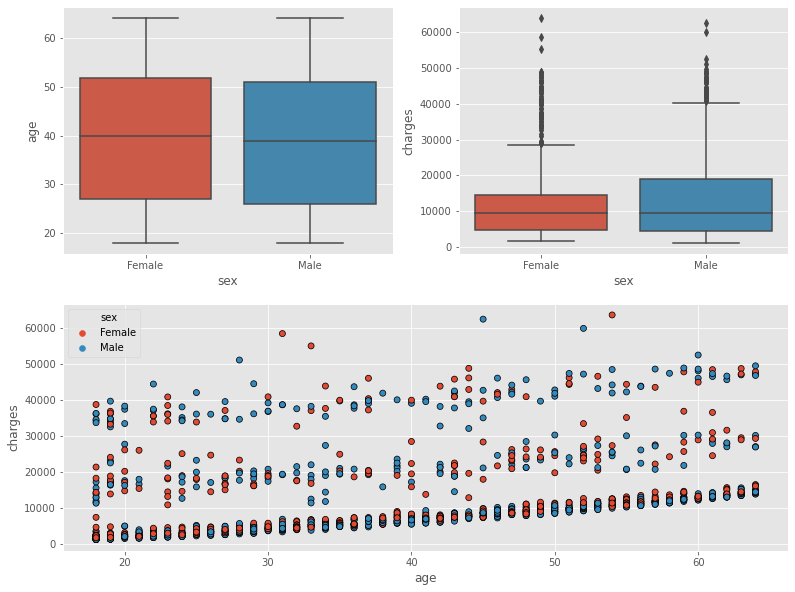

In [15]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'sex', y = 'age')
plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'sex', y = 'charges')
plt.subplot(2,2,(3,4))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex', edgecolor = 'k')
plt.legend(loc='upper left')
plt.show()

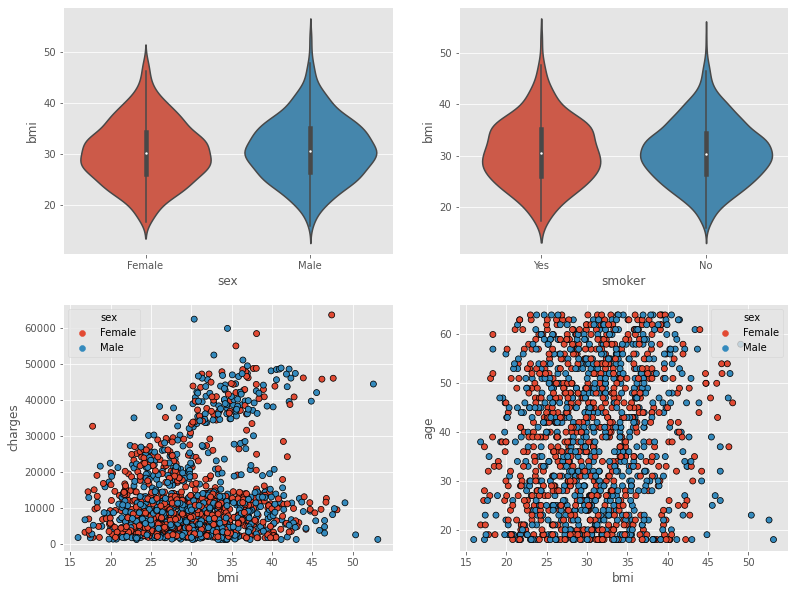

In [16]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.violinplot(data = df, x = 'sex', y = 'bmi')
plt.subplot(2,2,2)
sns.violinplot(data = df, x = 'smoker', y = 'bmi')
plt.subplot(2,2,3)
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'sex', edgecolor = 'k')
plt.legend(loc='upper left')
plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'bmi', y = 'age', hue = 'sex', edgecolor = 'k')
plt.show()

<div class="alert alert-warning">
<H4> 1. Scatterplot for BMI vs Charges shows : Increased Medical Charges for higher BMI regardless of Gender. </H4>
<H4> 2. Scatterplot for BMI vs Age doesn't reflect any conclusive relationship. </H4>
    </div>

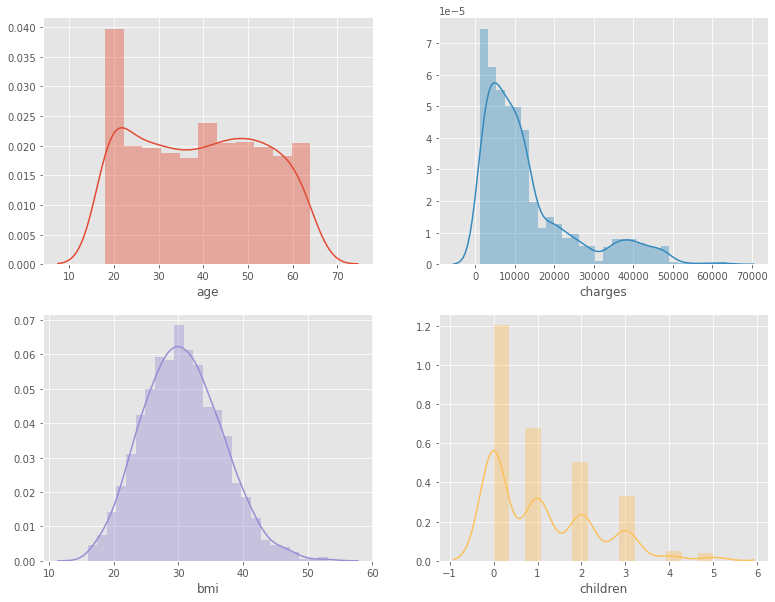

In [17]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.distplot(df.age, color='C0')
plt.subplot(2,2,2)
sns.distplot(df.charges, color='C1')
plt.subplot(2,2,3)
sns.distplot(df.bmi, color='C2')
plt.subplot(2,2,4)
sns.distplot(df.children, color='C4')
plt.show()

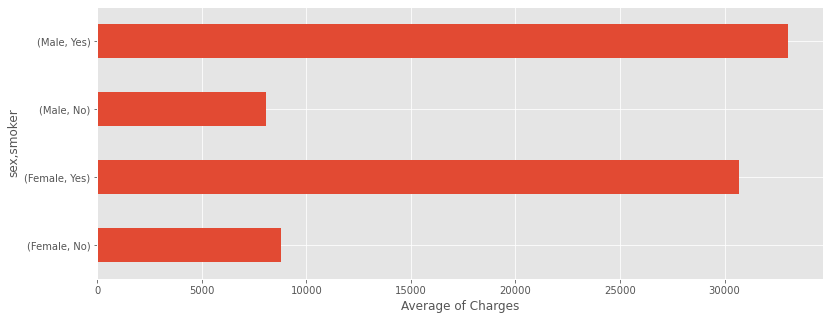

In [18]:
plt.figure(figsize=(13,5))
df.groupby(['sex','smoker'])['charges'].mean().plot(kind="barh")
plt.xlabel('Average of Charges')
plt.show()

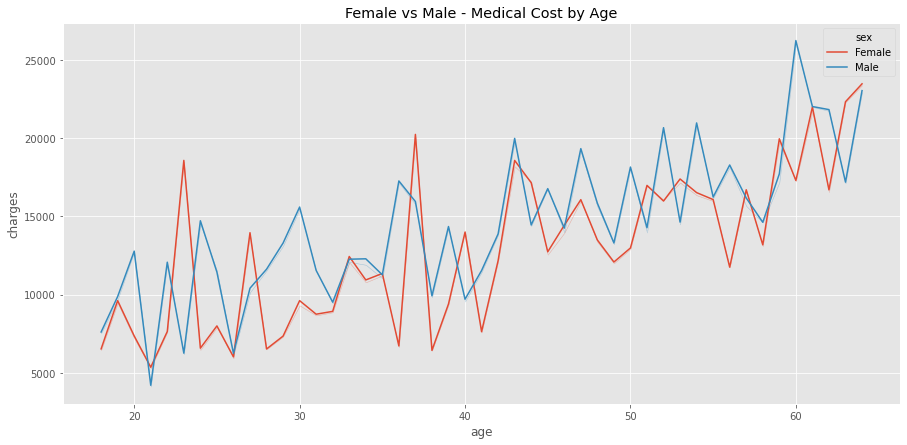

In [19]:
## Female vs Male - Incurred Medical Cost by Age
plt.figure(figsize=(15,7))
sns.lineplot(df["age"],df["charges"],hue=df["sex"],ci=0).set(title= 'Female vs Male - Medical Cost by Age')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<div class="alert alert-warning">
<H3> Key Observations: </H3>
<H4>
1. Charges incurred for males are more than charges incured for females. <br>
2. With increasing age of policy holder charges incured are going high for both male and female. <br>
3. There some spikes for female at an approximate ages of 23,28,43. <br>
4. Most claims are from southeast regions. <br>
5. Males who smoke have most claims and have higher bills. <br>
6. Number of claims made by female who dont smoke is more compared to female who smoke. <br>
</H4>
</div>


In [20]:
#Creing Age Group for BMI
category=pd.cut(df.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
df.insert(5,'BMIGroup',category)

In [21]:
df.groupby(df.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

<div class="alert alert-warning">
<H3> Key Observation: </H3>
<H4> The Medical Cost increases with increased BMI.As can be seen above, the Medical charges are highest for the BMI Group 45-55 </H4> 
</div>

In [22]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

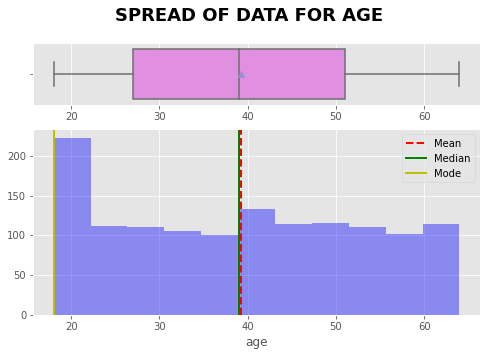

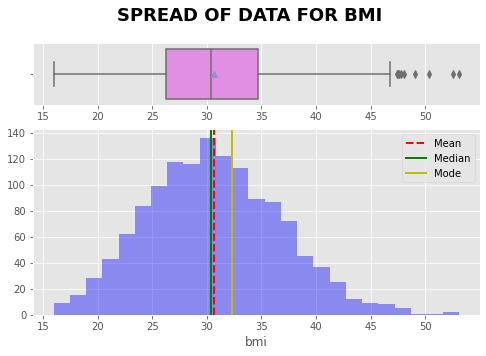

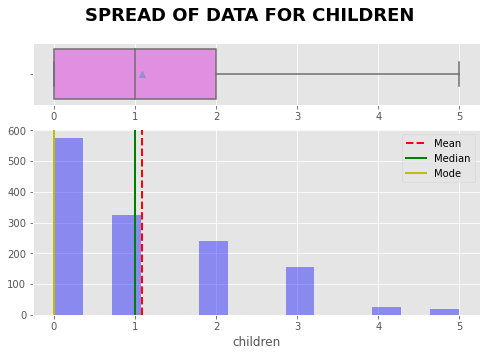

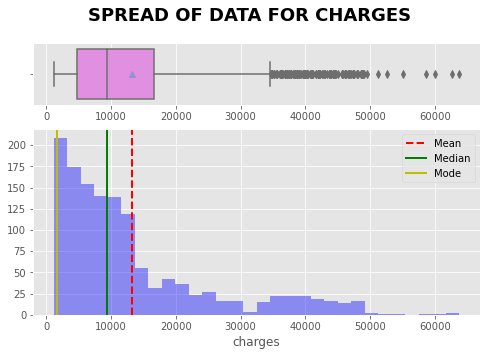

In [23]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

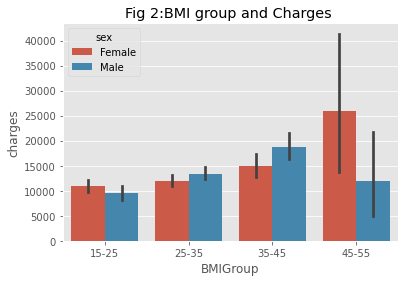

In [24]:
sns.barplot(x='BMIGroup',y='charges',hue='sex',data=df).set(title="Fig 2:BMI group and Charges " )

<div class="alert alert-warning">
<H4>
<font color='blue'>
    Females with most BMI has incured most charges to the insurance company.      
       BMI for male and females are not same.  
        Beneficary with higher BMI have incurred more cost to insurance.</font> </H4>
</div>

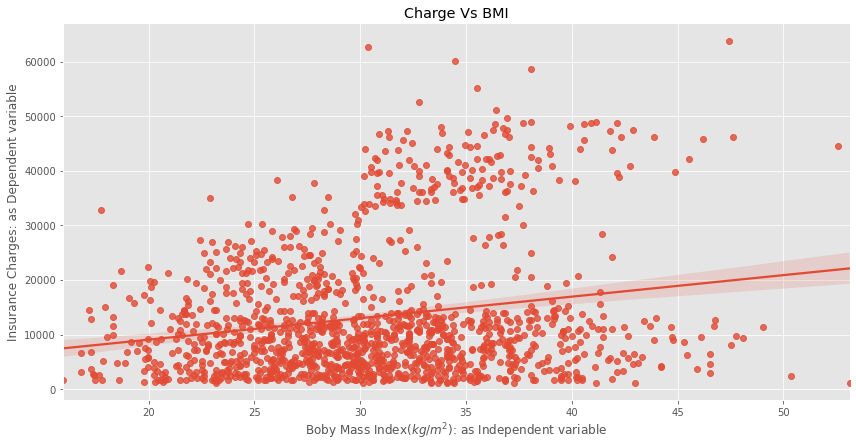

In [25]:

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [26]:
smoker=df.loc[df.smoker=="Yes"]
smoker.head()

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,Female,27.90,0,Yes,25-35,southwest,16884.9240
11,62,Female,26.29,0,Yes,25-35,southeast,27808.7251
14,27,Male,42.13,0,Yes,35-45,southeast,39611.7577
19,30,Male,35.30,0,Yes,35-45,southwest,36837.4670
23,34,Female,31.92,1,Yes,25-35,northeast,37701.8768


In [27]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
BMIGroup    274
region      274
charges     274
dtype: int64

In [28]:
nonsmoker=df.loc[df.smoker=='No']
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
BMIGroup    1064
region      1064
charges     1064
dtype: int64

In [29]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
charges_yes = smoker.charges
charges_no = nonsmoker.charges

In [30]:
print('Average Cost charged to Insurance for smoker is {} and nonsmoker is {} '.format(charges_yes.mean(),charges_no.mean()))

Average Cost charged to Insurance for smoker is 32050.23183153285 and nonsmoker is 8441.24905576642 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

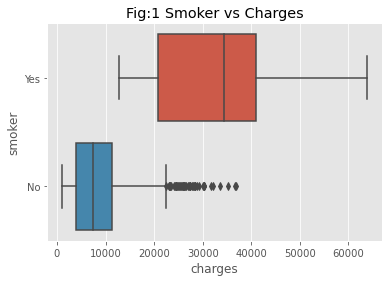

In [31]:
#smoker vs charges
sns.boxplot(x=df.charges,y=df.smoker,data=df).set(title="Fig:1 Smoker vs Charges")

In [39]:
#Separating smokers and non_smokers
smokers = df.loc[df.smoker == 'Yes']
non_smokers = df.loc[df.smoker == 'No']

In [40]:
#Getting linregress of non smokers
print("Non_Smokers:")
xs0 = non_smokers['age']
ys0 = non_smokers['charges']
res0 = linregress(xs0,ys0)
print(res0)

print("_" *50)

# Getting linregress of smokers
print("Smokers:")
xs1 = smokers['age']
ys1 = smokers['charges']
res1 = linregress(xs1,ys1)
print(res1)

Non_Smokers:
LinregressResult(slope=267.2489128311997, intercept=-2091.4205565650864, rvalue=0.6279467837664195, pvalue=9.17201813337121e-118, stderr=10.163738484459294)
__________________________________________________
Smokers:
LinregressResult(slope=305.237602109829, intercept=20294.12812691596, rvalue=0.36822444373077784, pvalue=3.1805852265485687e-10, stderr=46.730566757174735)


<div class="alert alert-warning">
<H4>
<font color='blue'>
    Key Observation:  <br>
1. If you are not smoking, every birthday you have increases the possible medical cost by 267.25 dollars.  <br>
2. If you are smoking, every birthday you have increases the possible medical cost by 305.24 dollars.  <br>
3. Note that the correlation coefficient of non-smokers are higher than the smokers BUT you pay more if you smoke. The statistic we should care about in this plot is the slope of the line not the correlation coefficient.
</font> </H4>
</div>

<div class="alert alert-success">
<H2> Section 2: Statistical Analysis: </H2>
<H3>In this section we would try to Apply Statistical Analysis to get deeper insight into following:</H3>
<H4>
•	2.1 Prove whether the medical claims made by the people who smoke is greater than those who don't? <br>
•	2.2 Prove whether the BMI of females is different from that of males.<br>
•	2.3 Is the proportion of smokers significantly different across different regions? <br>
    •	2.4 Is the mean BMI of women with no children, one child, and two children the same?</H4>
</div>

### <code style="background:yellow;color:black"> **2.1 Whether Medical claims for Smokers are greater than for Non-Smokers:** </code>

#### Define Null and Alternate Hypothesis
 H0:μ1<=μ2  The average charges of smokers is less than or equal to nonsmokers <br>
 Ha:μ1>μ2   The average charges of smokers is greater than nonsmokers
 
#### Significance Level: If p-value is less than alpha(α ) reject the null hypothesis. <br>
  α = 0.05

In [259]:
alpha=0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))

Test statistic = 30.168384427571915 , Pvalue =2.160499003168038e-118 , OnetailPvalue = 1.080249501584019e-118


In [260]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject NULL Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion: Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.080249501584019e-118 is less than alpha 0.05 
Reject NULL Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


<div class="alert alert-warning">
<H4> <font color='blue'> We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges </font> </H4></div>

### **<code style="background:yellow;color:black">2.2 Prove with statistical evidence whether the BMI of females is different from that of males.</code>** 

Let  **μ1 μ2**  and be the respective population means for BMI of males and BMI of females:

**Define null and alternative hypothesis:**  
     <font color='blue'>
     H0:μ1−μ2=0  There is no difference between the BMI of Male and BMI of female.  
     Ha:μ1−μ2<>0  There is difference between the BMI of Male and BMI of female. </font>  
     
*Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.*

In [261]:
#Calculating Test Statistic and p-value
#get all observation for male.
df_male=df.loc[df.sex=="Male"]
#get all observation for females
df_female=df.loc[df.sex=="Female"]

#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

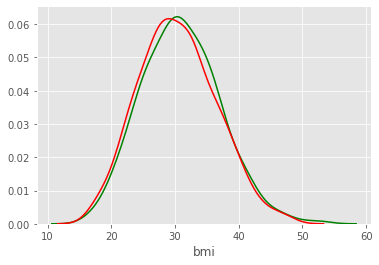

In [262]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)

In [263]:
print ('Mean BMI for Males   --> ',df_male.bmi.mean())
print ('Mean BMI for Females --> ',df_female.bmi.mean())

Mean BMI for Males   -->  30.943128698224832
Mean BMI for Females -->  30.377749244713023


In [264]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.696752635752224 , pvalue =  0.08997637178984932


In [265]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


<div class="alert alert-warning">
<H4><font color='blue'> We fail to reject the null hypothesis and can conclude that there is no difference between BMI of Female and BMI of Male. </font></H4>
</div>

### **<code style="background:yellow;color:black">2.3 Is the proportion of smokers significantly different across different regions?</code>** 


**Define null and alternative hypothesis:**  
     <font color='blue'>
     H0: Smokers proportions is not significantly different across different regions.  
     Ha: Smokers proportions is different across different regions </font>  
     
*Since two different categorical variables are compared - smoker and different region-  we'll perform a Chi-sq Test.*

In [266]:
# Calculate T statistic and p-value
contigency= pd.crosstab(df.region, df.smoker)
contigency

smoker,No,Yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


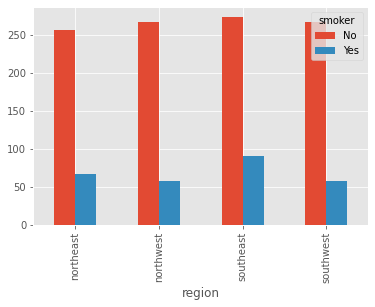

In [267]:
 contigency.plot(kind='bar')

In [268]:
# Using the chi2_contingency test 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [269]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


<div class="alert alert-warning">
<H4> <font color='blue'> We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions. </font></H4></div>

### <code style="background:yellow;color:black"> **2.4 Is the mean BMI of women with no children, one child, and two children the same?** </code>

**Define null and alternative hypothesis:**  
     <font color='blue'>
     H0: μ1 = μ2 = μ3 The mean BMI of women with no children , one child,two children is same  
     Ha: Atleast one of mean BMI of women is not same </font>  
     
*Significance Level: α = 0.05*

In [270]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,Female,27.90,0,Yes,25-35,southwest,16884.92400
5,31,Female,25.74,0,No,25-35,southeast,3756.62160
6,46,Female,33.44,1,No,25-35,southeast,8240.58960
9,60,Female,25.84,0,No,25-35,northwest,28923.13692
11,62,Female,26.29,0,Yes,25-35,southeast,27808.72510


In [271]:
df_female_child.groupby([df_female_child.children]).mean().bmi

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

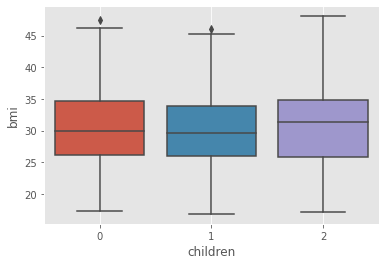

In [272]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [273]:
# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


<div class="alert alert-warning">
<H4><font color='blue'> P value is 0.715858 and it is greater than aplha(0.05) ,We failed to reject the null hypothesis and conclude that mean BMI of women with no children,one children, two children is same. </font></H4></div>

<div class="alert alert-warning">
    <H3> <font color='black'>Recommendation: Based on Statistical Analysis </font></H3>
<H4>
•	 Based on EDA and statistical evidence it can be seen that customer who smoke or have higher BMI have more higher claims. We can encourage customers to quit smoking by providing them incentive points for talking to life coach, get help for improving lifestyle habits, Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points. <br><br>
•	 We can have Active wellness programs which can help up reduce claims related to BMI. <br><br>
•	 High BMI is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices. <br><br>
•	 Provide discount coupons for Gym or fitness devices encouraging customers to exercise. <br>
</H4></div>

<div class="alert alert-success">
    <H2>Section 3: Application of Machine Learning Algorithm </H2>
</div>

In [274]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

In [275]:
# Verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'BMIGroup' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 8)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'BMIGroup' 'charges' 'OHE_Male' 'OHE_1' 'OHE_2' 'OHE_3'
 'OHE_4' 'OHE_5' 'OHE_Yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 14)


<div class="alert alert-warning">
<H3>Train Test Split</H3>
</div>

In [282]:
from sklearn.model_selection import train_test_split
X1 = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X = X1.drop('BMIGroup',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

<div class="alert alert-warning">
    <H3>Model Building</H3>
</div>

In [284]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
thetas = ['intercept']
for col in X_train.columns.tolist():
    thetas.append(col)
coeffs = list(zip(thetas,sk_theta))
pd.DataFrame(coeffs,columns = ["Coefficient","Value"])


,Coefficient,Value
0,intercept,7.059171
1,age,0.033134
2,bmi,0.013517
3,OHE_Male,-0.067767
4,OHE_1,0.149457
5,OHE_2,0.272919
6,OHE_3,0.244095
7,OHE_4,0.523339
8,OHE_5,0.466030
9,OHE_Yes,1.550481


<div class="alert alert-success">
<H3>Model evaluation</H3>
<H4>
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula:  
J(θ)=1m∑i=1m(y^i−yi)2 </H4>
 

Here  y^  is predicted value and  y¯  is mean value of  y . 

In [285]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055319


<div class="alert alert-warning">
<font color='blue'>The model returns  R Square  value of **77.95%**, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation.</font></div>

<div class="alert alert-success">
<H3>Model Validation</H3>
<H4>In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following:</H4>

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value  
2. The residual error plot should be normally distributed.  
3. The mean of residual error should be 0 or close to 0 as much as possible.  
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.  
5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  **VIF=1/(1−R^2)** , If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.  
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.
    </div>

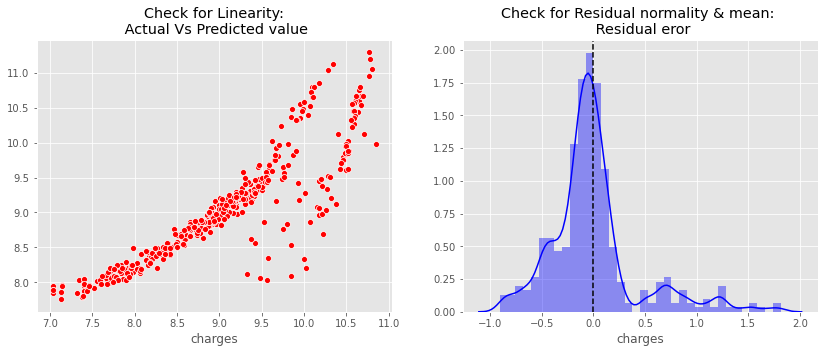

In [286]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

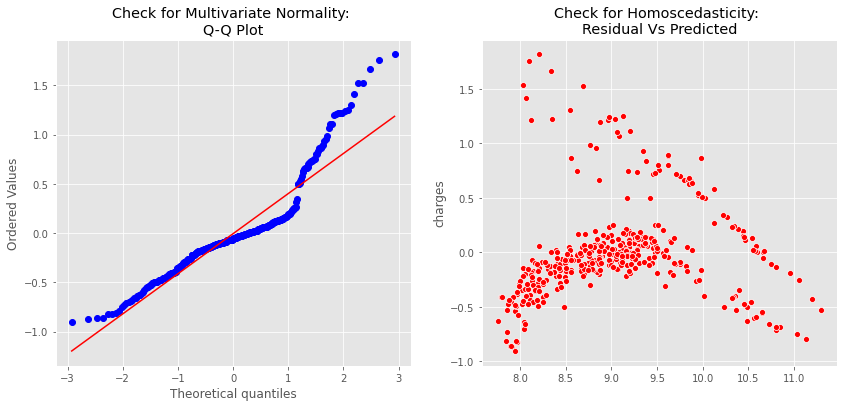

In [287]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [288]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138

<div class="alert alert-warning">
<H3>The model assumption linear regression as follows:</H3>
    


<font color='blue'>
1.In our model the actual vs predicted plot is curve so linear assumption fails.

    
2.The residual mean is zero and residual error plot right skewed.     
    

3.Q-Q plot shows as value log value greater than 1.5 trends to increase.   

    
4.The plot is exhibit heteroscedastic, error will insease after certian point.
    
5.Variance inflation factor value is less than 5, so no multicollearity.   
</font></div>